## MOM025-WOMBAT-PI Case

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

import xarray
from xarray.ufuncs import square, sqrt
#import scipy
#sfrom scipy.interpolate import RegularGridInterpolator, griddata

#%matplotlib inline

#import numpy as np
#import matplotlib.pyplot as plt
#from netCDF4 import Dataset
#import os
#import pickle

#import dask
#from dask import delayed
#import dask.array as da
#import dask.dataframe as dd
#from dask.multiprocessing import get
#from dask.async import get_sync
#from dask.diagnostics import ProgressBar

#import pandas as pd
#import xarray as xr
#from glob import glob
#from mpl_toolkits.basemap import Basemap, shiftgrid

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pbar = ProgressBar()
#pbar.register()

In [3]:
# set up dask to initiate 4 parallel processors.
#dask.set_options(get=dask.multiprocessing.get, num_workers=4)

In [4]:
# Input NetCDF file info
gridfile ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'

#wombat with neutral physics cntrl file seems to not have ty_trans_rho and pot_rho_0 in ocean_month.nc
cntrlgm_file ='/g/data1/v45/mtc599/mom5/jun16z/OUTPUT/ocean_month*'
cntrl_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

#pi has annual means in ocean_month.nc
pi_file ='/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*.nc'
eq4_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output*/ocean.nc'

sim_files =[cntrlgm_file,pi_file,eq4_file]
sim_names =['CNTRL','PI','Eq4']
print sim_files
print sim_files[0]

['/g/data1/v45/mtc599/mom5/jun16z/OUTPUT/ocean_month*', '/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*.nc', '/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output*/ocean.nc']
/g/data1/v45/mtc599/mom5/jun16z/OUTPUT/ocean_month*


In [5]:
# Extract the variables
nc = Dataset(gridfile, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
nc.close() # close the file

nc = Dataset(cntrl_file, mode='r') # file handle, open in read only mode
xt_ocean = nc.variables['xt_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
potrho = nc.variables['potrho'][:]
#ssh = nc.variables['sea_level'][:]
#mld = nc.variables['mld'][:]
cntrl_ty_trans_rho = nc.variables['ty_trans_rho'][:]
cntrl_ty_trans = nc.variables['ty_trans'][:]
cntrl_pot_rho_0 = nc.variables['pot_rho_0'][:]
cntrl_temp = nc.variables['temp'][:]
#ty_trans = nc.variables['ty_trans'][:]
nc.close() # close the file

lat=yt_ocean

print cntrl_ty_trans_rho.shape
cntrl_psi_rho=np.ma.cumsum(np.ma.sum(cntrl_ty_trans_rho[:,:,:,:],axis=3),axis=1)
print cntrl_psi_rho.shape

print cntrl_ty_trans.shape
cntrl_psi=np.ma.cumsum(np.ma.sum(cntrl_ty_trans[:,:,:,:],axis=3),axis=1)
print cntrl_psi.shape


(1, 80, 1080, 1440)
(1, 80, 1080)
(1, 50, 1080, 1440)
(1, 50, 1080)


In [46]:
#Calc x_trans ACC streamlines
#'/g/data1/v45/pas561/mom/archive/wombat_jun16z/wombat_cntrl.tx_trans.ncra0-4.nc'
#'/g/data1/v45/pas561/mom/archive/wombat_jun16z/output1971/ocean__1970_07.nc'
nc = Dataset('/g/data1/v45/pas561/mom/archive/wombat_jun16z/output1971/ocean__1970_07.nc', mode='r') # file handle, open in read only mode
xt_ocean = nc.variables['xu_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
cntrl_tx_trans = nc.variables['tx_trans'][:]
nc.close() # close the file

lat=yt_ocean

print cntrl_tx_trans.shape
cntrl_psi_a=np.ma.sum(cntrl_tx_trans[0,:,:,:],axis=0)
print cntrl_psi_a.shape
cntrl_psi=np.ma.cumsum(cntrl_psi_a[:,:],axis=0)
print cntrl_psi.shape

nc = Dataset('/g/data1/v45/pas561/mom/archive/wombat_jun16z/wombat_cntrl.tx_trans.ncra0-4.nc', mode='r') # file handle, open in read only mode
xt_ocean = nc.variables['xu_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
cntrl_tx_trans = nc.variables['tx_trans'][:]
nc.close() # close the file


print cntrl_tx_trans.shape
cntrl_psi_a=np.ma.sum(cntrl_tx_trans[0,:,:,:],axis=0)
print cntrl_psi_a.shape
cntrl_psi2=np.ma.cumsum(cntrl_psi_a[:,:],axis=0)
print cntrl_psi2.shape


(1, 50, 1080, 1440)
(1080, 1440)
(1080, 1440)
(1, 50, 1080, 1440)
(1080, 1440)
(1080, 1440)


[-200. -180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.   20.
   40.   60.   80.  100.  120.  140.  160.  180.  200.]
[  0  20  40  60  80 100 120 140 160 180]
[  0  20  40  60  80 100 120 140 160 180]


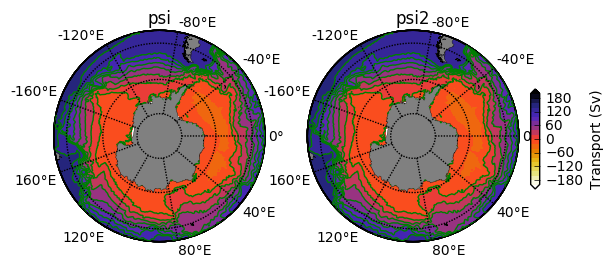

In [47]:
#plot ACC transport
levels = np.linspace(-200,200,21)
print levels

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_psi, cmap=plt.cm.CMRmap_r, levels=levels, extend='both') #CMRmap_r, gist_stern_r
clev3 = np.arange(0,200,20)
print clev3
map.contour(X,Y,cntrl_psi,levels=clev3,colors='g',linewidths=1)
plt.title('psi')

plt.subplot(1,2,2)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_psi2, cmap=plt.cm.CMRmap_r, levels=levels, extend='both') #CMRmap_r, gist_stern_r
clev3 = np.arange(0,200,20)
print clev3
map.contour(X,Y,cntrl_psi2,levels=clev3,colors='g',linewidths=1)
plt.title('psi2')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('Transport (Sv)')

In [48]:
import netCDF4 as nc4
ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/wombat_jun16z/output1971/cntrl_psi.nc', 'a')

var = ofile.variables['tx_trans']
print var.shape
print cntrl_psi.shape
var[0,0,:,:] = cntrl_psi

ofile.sync()
ofile.close()

import netCDF4 as nc4
ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/wombat_jun16z/wombat_cntrl.psi.ncra0-4.nc', 'a')

var = ofile.variables['tx_trans']
print var.shape
print cntrl_psi2.shape
var[0,0,:,:] = cntrl_psi2

ofile.sync()
ofile.close()

(1, 1, 1080, 1440)
(1080, 1440)
(1, 1, 1080, 1440)
(1080, 1440)


## Calc y_trans MOC

In [6]:
#calculat mocs across all outdirs
sim_files =[cntrlgm_file,pi_file,eq4_file]

ii=-1
for f in sim_files:
    ii+=1
    
    print f
    
    #no cumsum in mfdataset
    ff=xarray.open_mfdataset(f,engine='netcdf4',decode_times=False)
    
    if ii==0:
        print ff.ty_trans.shape
        #monthly data from 1820-1999, get 1970-74 Avg,to save time
        v=np.ma.mean(ff.ty_trans[1800:1859,:,:,:],axis=0)
        cntrlgm=np.ma.cumsum(np.ma.sum(v[:,:,:],axis=2),axis=0)
        #pi = ff.ty_trans_rho.sum('grid_xt_ocean').cumsum('potrho')    
    if ii==1:
        print ff.ty_trans.shape
        pi=np.ma.cumsum(ff.ty_trans[:,:,:,:].sum('xt_ocean'),axis=1)
        #pi1=np.ma.cumsum(np.ma.sum(ff.ty_trans[:,:,:,:],axis=3),axis=1)
    if ii==2:
        print ff.ty_trans.shape
        eq4=np.ma.cumsum(ff.ty_trans[:,:,:,:].sum('xt_ocean'),axis=1)
        #eq4=np.ma.cumsum(np.ma.sum(ff.ty_trans[:,:,:,:],axis=3),axis=1)
    

/g/data1/v45/mtc599/mom5/jun16z/OUTPUT/ocean_month*
(2160, 50, 1080, 1440)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*.nc
(50, 50, 1080, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output*/ocean.nc
(71, 50, 1080, 1440)


In [7]:
print cntrlgm.shape
#print pi1.shape
print pi.shape
print eq4.shape


(50, 1080)
(50, 50, 1080)
(71, 50, 1080)


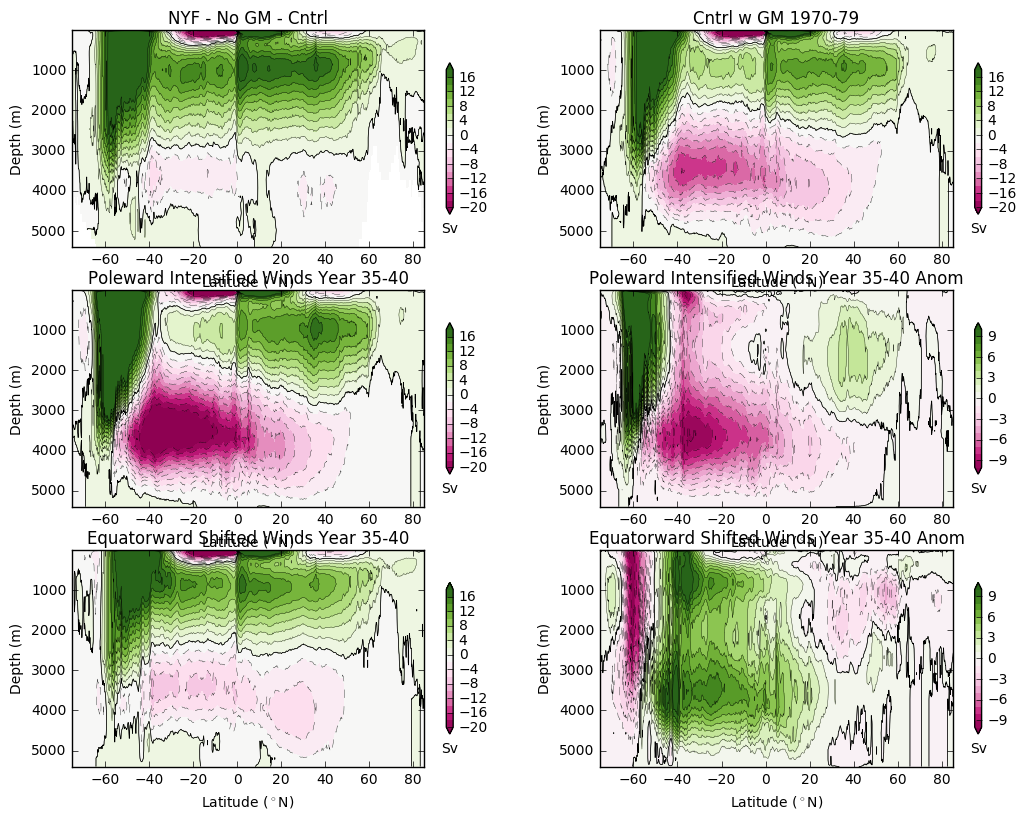

In [8]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(321)
clev = np.arange(-20,20,2)
plt.contourf(lat,st_ocean,cntrl_psi[0,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,cntrl_psi[0,:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,cntrl_psi[0,:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('NYF - No GM - Cntrl')

plt.subplot(322)
clev = np.arange(-20,20,2)
plt.contourf(lat,st_ocean,cntrlgm[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,cntrlgm[:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,cntrlgm[:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Cntrl w GM 1970-79')

plt.subplot(323)
clev = np.arange(-20,20,2)
plt.contourf(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40')

plt.subplot(324)
clev = np.arange(-10,11,1)
plt.contourf(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-cntrlgm[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-cntrlgm[:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-cntrlgm[:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40 Anom')


plt.subplot(325)
clev = np.arange(-20,20,2)
plt.contourf(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40')

plt.subplot(326)
clev = np.arange(-10,11,1)
plt.contourf(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40 Anom')



## Calc y_trans_rho MOC

In [9]:
#dsx = xr.open_dataset(OceanFile, decode_times=False, engine='netcdf4')
#psi = dsx.ty_trans_rho.isel(time=0).sum('grid_xt_ocean').cumsum('potrho')

#calculat mocs across all outdirs
sim_files =[pi_file,eq4_file]

ii=-1
for f in sim_files:
    ii+=1
    
    
    print f
    #nc = Dataset(f, mode='r') # file handle, open in read only mode
    #ty_trans_rho = nc.variables['ty_trans_rho'][:]
    #ty_trans = nc.variables['ty_trans'][:]
    #nc.close() # close the file
    
    ff=xarray.open_mfdataset(f,engine='netcdf4',decode_times=False)
    
    if ii==0:
        print ff.ty_trans_rho.shape
        pi=np.ma.cumsum(ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean'),axis=1)
        #pi1=np.ma.cumsum(np.ma.sum(ff.ty_trans_rho[:,:,:,:],axis=3),axis=1)
        #pi = ff.ty_trans_rho.sum('grid_xt_ocean').cumsum('potrho')
    if ii==1:
        print ff.ty_trans_rho.shape
        eq4=np.ma.cumsum(ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean'),axis=1)
        #eq4=np.ma.cumsum(np.ma.sum(ff.ty_trans_rho[:,:,:,:],axis=3),axis=1)
        #eq4 = ff.ty_trans_rho.sum('grid_xt_ocean').cumsum('potrho')
    
    #resid_psi[ii,0:ty_trans_rho.shape[0],:,:] = np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    #resid_psiz[ii]= np.ma.cumsum(np.ma.sum(ty_trans[:,:,:,:],axis=3),axis=1)
    

 

/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*.nc
(50, 80, 1080, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output*/ocean.nc
(71, 80, 1080, 1440)


In [10]:
print pi.shape, eq4.shape 

(50, 80, 1080) (71, 80, 1080)


# Plot Global MOC from ty_trans_rho

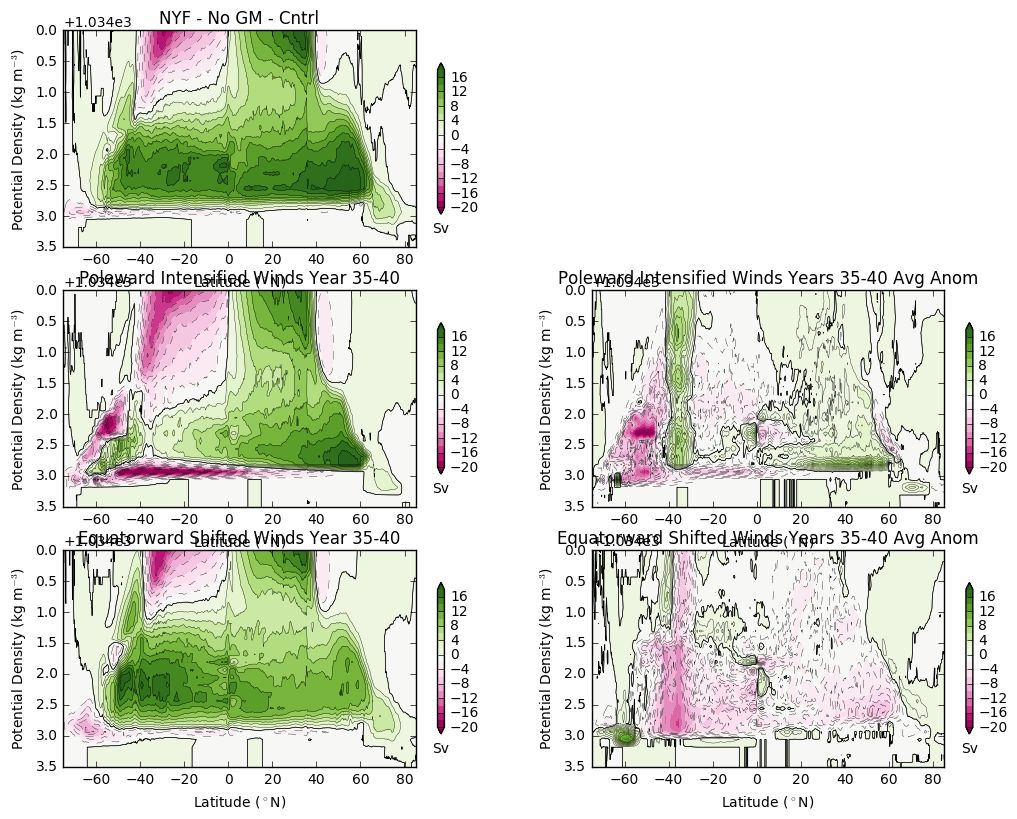

In [11]:
#lstyravg=5

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(321)
clev = np.arange(-20,20,2)
plt.contourf(lat,potrho,cntrl_psi_rho[0,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,cntrl_psi_rho[0,:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,cntrl_psi_rho[0,:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('NYF - No GM - Cntrl')

plt.subplot(323)
clev = np.arange(-20,20,2)
plt.contourf(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40')

plt.subplot(324)
#clev = np.arange(-10,10.25,.25)
clev2 = np.arange(-10,11,1)
plt.contourf(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0)-np.ma.mean(pi[0:1,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0)-np.ma.mean(pi[0:1,:,:],axis=0),levels=clev2,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0)-np.ma.mean(pi[0:1,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Years 35-40 Avg Anom')

plt.subplot(325)
clev = np.arange(-20,20,2)
plt.contourf(lat,potrho,np.ma.mean(eq4[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(eq4[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(eq4[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40')

plt.subplot(326)
#clev = np.arange(-10,10.25,.25)
clev2 = np.arange(-10,11,1)
plt.contourf(lat,potrho,np.ma.mean(eq4[35:40,:,:],axis=0)-np.ma.mean(eq4[0:1,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(eq4[35:40,:,:],axis=0)-np.ma.mean(eq4[0:1,:,:],axis=0),levels=clev2,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(eq4[35:40,:,:],axis=0)-np.ma.mean(eq4[0:1,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Years 35-40 Avg Anom')

plt.show()

#plt.savefig('/g/data1/v45/pas561/figs/WaveGMOCAvg.pdf')
#plt.savefig('/g/data1/v45/pas561/figs/WaveGMOCAvg.png',dpi=220)


['PI', 'Eq4']
Bounding latitudes and rho of psi_sh average: [-59.95944891] [-39.93377498] 1035.5625
Bounding latitudes of psi_nh average: [ 40.12520403] [ 60.08436456] 1035.5625
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*.nc
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output*/ocean.nc


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]


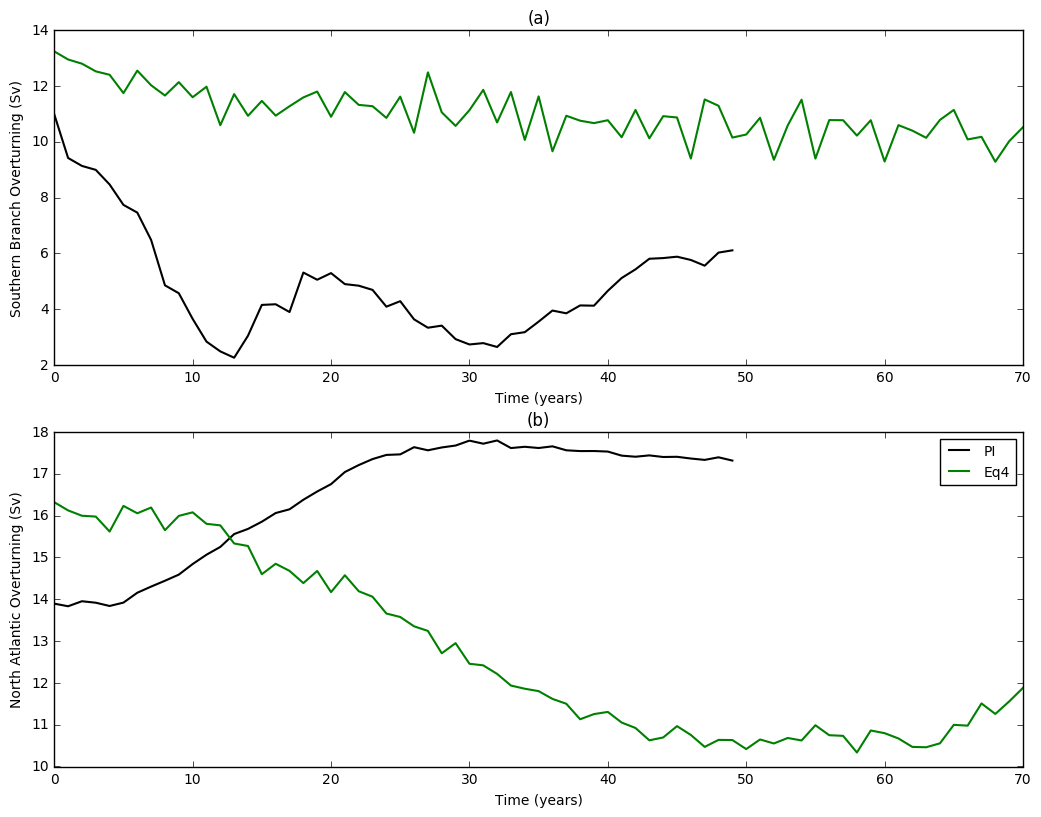

In [12]:
cols = ['k','g']
lines = ['-','-']
exp_names = ['PI','Eq4']
labels = ['PI','Eq4']

print labels

# average between i1 and i2
#i1 = 600
#i2=610
#j1 = 230
#j2=235

i1=np.argwhere(yt_ocean>-60)# and lat<-45)
i2=np.argwhere(yt_ocean>-40)# and lat<-45)

j1=np.argwhere(yt_ocean>40)# and lat<-45)
j2=np.argwhere(yt_ocean>60)# and lat<-45)

i1=i1[0]
i2=i2[0]
j1=j1[0]
j2=j2[0]
z1=60

print "Bounding latitudes and rho of psi_sh average:", yt_ocean[i1], yt_ocean[i2], potrho[z1]
print "Bounding latitudes of psi_nh average:", yt_ocean[j1], yt_ocean[j2],potrho[z1]

sim_files =[pi_file,eq4_file]

ii=-1
for f in sim_files:
    ii+=1
    print f

    if ii==0:
        psi = pi[:,z1:,i1:i2]
        psj = pi[:,z1:,j1:j2]
    if ii==1:
        psi = eq4[:,z1:,i1:i2]
        psj = eq4[:,z1:,j1:j2]
               
    #sh upper moc
    #mean over lat band
    psi_bar = np.mean(psi,2)
    #max over lat band
    #psi_bar = np.max(psi,2)
    #max over depth band
    psi_ts = np.max(psi_bar,1)
    #print 'psi_bar nh', psi_bar.shape
    #print 'psi_ts', psi_ts.shape
    
    # Add year 500
    #T = np.insert(T,0,500.)
    #psi_ts = np.insert(psi_ts,0,16.6)
    T = range(0,psi.shape[0]) 
    #print T
    plt.subplot(211)
    plt.plot(T,psi_ts,linestyle=lines[ii],color=cols[ii],linewidth=1.5)
    
    # do lower cell
    #psj_bar = np.mean(psj,2)
    #psj_ts = -np.min(psj_bar[:,50:],1)
    ##psj_ts = np.insert(psj_ts,0,6.5)
    
                   
    #nh upper moc
    #mean over lat band
    psj_bar = np.mean(psj,2)
    #max over lat band
    #psj_bar = np.max(psi,2)
    #max over depth band
    psj_ts = np.max(psj_bar,1)
    #print 'psj_bar nh', psj_bar.shape
    #print 'psj_ts', psj_ts.shape

    plt.subplot(212)
    plt.plot(T,psj_ts,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)

plt.legend()
#print "Bounding latitudes of psi_upper average:", lat[i1], lat[i2]
#print "Bounding latitudes of psi_lower average:", lat[j1], lat[j2]
    
plt.subplot(211)
plt.ylabel('Southern Branch Overturning (Sv)')
plt.xlabel('Time (years)')
plt.title('(a)')

plt.subplot(212)
plt.ylabel('North Atlantic Overturning (Sv)')
plt.xlabel('Time (years)')
plt.title('(b)')
plt.legend(fontsize=10)

#plt.savefig('/g/data1/v45/pas561/figs/WaveGMOCTsi.png',dpi=220)



In [13]:
#calculate across all outdirs
#no density data in the cntrlnogm
sim_files =[pi_file,eq4_file]

ii=-1
for f in sim_files:
    ii+=1
        
    print f
    
    ff=xarray.open_mfdataset(f,engine='netcdf4',decode_times=False)
   
    if ii==0:
        pi=ff.pot_rho_0[:,:,:,:]
        print pi.shape
    if ii==1:
        eq4=ff.pot_rho_0[:,:,:,:]
        print eq4.shape
    
    
    #resid_psi[ii,0:ty_trans_rho.shape[0],:,:] = np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    #resid_psiz[ii]= np.ma.cumsum(np.ma.sum(ty_trans[:,:,:,:],axis=3),axis=1)
    
 

/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*.nc
(50, 50, 1080, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output*/ocean.nc
(71, 50, 1080, 1440)


In [14]:
print eq4.shape
print pi.shape

(71, 50, 1080, 1440)
(50, 50, 1080, 1440)


(1, 50, 1080, 1440)
(50, 1080, 1440)
(50, 1080)
pi:  (50, 50, 1080, 1440)
(50, 1080, 1440)
(50, 1080)
pi:  (50, 50, 1080, 1440)
(50, 1080, 1440)
(50, 1080)
eq4:  (71, 50, 1080, 1440)
(50, 1080, 1440)
(50, 1080)
eq4:  (71, 50, 1080, 1440)
(50, 1080, 1440)
(50, 1080)


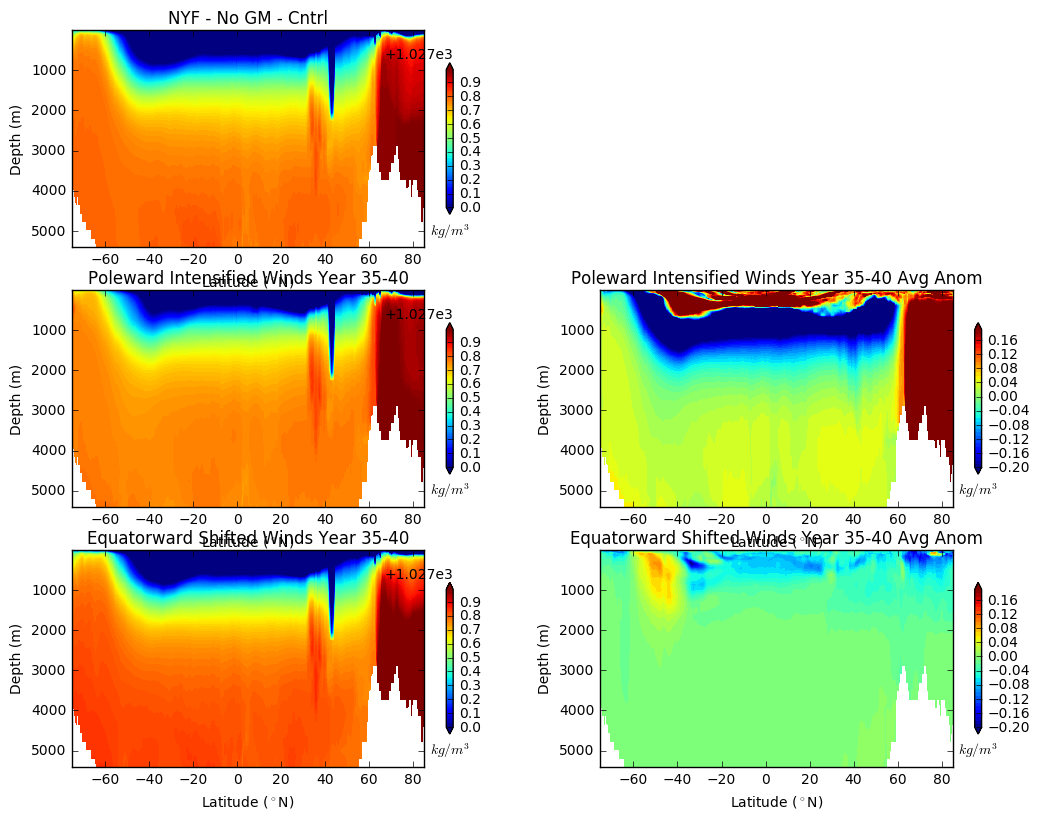

In [15]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#print "cntrlnogm: ", cntrlnogm.shape
#v=np.ma.mean(cntrlnogm[35:40,:,:,:],axis=0)
#print v.shape
#vv=np.ma.mean(v,axis=2)
#print vv.shape

print cntrl_pot_rho_0.shape
v=cntrl_pot_rho_0[0,:,:,:]
print v.shape
vv=np.ma.mean(v,axis=2)
print vv.shape

#vv=np.ma.mean(cntrl_pot_rho_0[0,:,:,:],axis=2)
#print vv.shape

plt.subplot(321)
clev = np.arange(1027.0,1028.0,.01)
plt.contourf(lat,st_ocean,vv,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$kg/m^3$')
#plt.contour(lat,potrho,cntrl_psi[0,:,:],levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,potrho,cntrl_psi[0,:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('NYF - No GM - Cntrl')

print "pi: ", pi.shape
v=np.ma.mean(pi[35:40,:,:,:],axis=0)
print v.shape
vv=np.ma.mean(v,axis=2)
print vv.shape

plt.subplot(323)
clev = np.arange(1027.0,1028.0,.01)
plt.contourf(lat,st_ocean,vv,levels=clev,extend='both')
#plt.contourf(lat,potrho,np.ma.mean(np.ma.mean(pi[35:40,:,:,:],axis=0),axis=3),levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$kg/m^3$')
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40')

print "pi: ", pi.shape
v=np.ma.mean(pi[35:40,:,:,:],axis=0)-np.ma.mean(pi[0:1,:,:,:],axis=0)
print v.shape
vv=np.ma.mean(v,axis=2)
print vv.shape

plt.subplot(324)
clev = np.arange(-.2,.2,.01)
plt.contourf(lat,st_ocean,vv,levels=clev,extend='both')
#plt.contourf(lat,potrho,np.ma.mean(np.ma.mean(pi[35:40,:,:,:],axis=0),axis=3),levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$kg/m^3$')
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40 Avg Anom')

print "eq4: ", eq4.shape
v=np.ma.mean(eq4[35:40,:,:,:],axis=0)
print v.shape
vv=np.ma.mean(v,axis=2)
print vv.shape

plt.subplot(325)
clev = np.arange(1027.0,1028.0,.01)
plt.contourf(lat,st_ocean,vv,levels=clev,extend='both')
#plt.contourf(lat,potrho,np.ma.mean(np.ma.mean(pi[35:40,:,:,:],axis=0),axis=3),levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$kg/m^3$')
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40')

print "eq4: ", eq4.shape
v=np.ma.mean(eq4[35:40,:,:,:],axis=0)-np.ma.mean(eq4[0:1,:,:,:],axis=0)
print v.shape
vv=np.ma.mean(v,axis=2)
print vv.shape

plt.subplot(326)
clev = np.arange(-.2,.2,.01)
plt.contourf(lat,st_ocean,vv,levels=clev,extend='both')
#plt.contourf(lat,potrho,np.ma.mean(np.ma.mean(pi[35:40,:,:,:],axis=0),axis=3),levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$kg/m^3$')
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,potrho,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40 Avg Anom')


plt.show()

## Plot Temp Z avg

In [16]:
sim_files =[cntrlgm_file,pi_file,eq4_file]

ii=-1
for f in sim_files:
    ii+=1
    
    print f
    
    #no cumsum in mfdataset
    ff=xarray.open_mfdataset(f,engine='netcdf4',decode_times=False)
    
    if ii==0:
        print ff.temp.shape
        #monthly data from 1820-1999, get 1970-74 Avg,to save time
        #cntrlgm=ff.temp.mean('xt_ocean')[]
        #v=ff.temp.isel(Time=[1800]).mean('xt_ocean')
        v=np.ma.mean(ff.temp[1800:1859,:,:,:],axis=0)
        print 'v: ', v.shape
        cntrlgm=np.ma.mean(v[:,:,:],axis=2)
        v=0.0
    if ii==1:
        print ff.temp.shape
        pi=ff.temp.mean('xt_ocean')
        
    if ii==2:
        print ff.temp.shape
        eq4=ff.temp.mean('xt_ocean')
        #eq4=np.ma.cumsum(np.ma.sum(ff.ty_trans[:,:,:,:],axis=3),axis=1)
    

/g/data1/v45/mtc599/mom5/jun16z/OUTPUT/ocean_month*
(2160, 50, 1080, 1440)
v:  (50, 1080, 1440)
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*.nc
(50, 50, 1080, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output*/ocean.nc
(71, 50, 1080, 1440)


(50, 1080)
float64
(1, 50, 1080, 1440)


MemoryError: 

Traceback
---------
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/async.py", line 268, in execute_task
    result = _execute_task(task, data)
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/async.py", line 248, in _execute_task
    args2 = [_execute_task(a, cache) for a in args]
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/async.py", line 245, in _execute_task
    return [_execute_task(a, cache) for a in arg]
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/async.py", line 248, in _execute_task
    args2 = [_execute_task(a, cache) for a in args]
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/async.py", line 249, in _execute_task
    return func(*args2)
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/dask/array/core.py", line 54, in getarray
    c = np.asarray(c)
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/core/numeric.py", line 482, in asarray
    return array(a, dtype, copy=False, order=order)
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/xarray/core/indexing.py", line 355, in __array__
    return np.asarray(array[self.key], dtype=None)
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/xarray/conventions.py", line 354, in __getitem__
    self.scale_factor, self.add_offset, self._dtype)
  File "/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/xarray/conventions.py", line 56, in mask_and_scale
    values = np.array(array, dtype=dtype, copy=True)


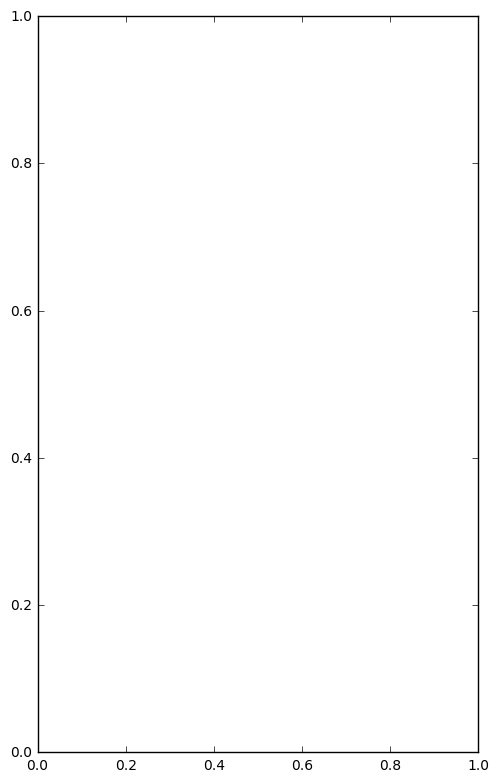

In [17]:
print cntrlgm.shape
print cntrlgm.dtype
print cntrl_temp.shape

#why does cntrlgm here cause a memory Error?

plt.subplot(121)
clev = np.arange(0,25,1)
plt.contourf(lat,st_ocean,cntrlgm,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,cntrlgm,levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,cntrlgm,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Cntrl w GM 1970-79')

In [ ]:
print cntrlgm.shape

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(321)
clev = np.arange(0,25,1)
plt.contourf(lat,st_ocean,v[],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(cntrl_temp[0,:,:,:],axis=2),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(cntrl_temp[0,:,:,:],axis=2),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('NYF - No GM - Cntrl')


plt.subplot(323)
clev = np.arange(0,25,1)
plt.contourf(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40')

plt.subplot(324)
clev = np.arange(-2,2,.1)
plt.contourf(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-np.ma.mean(pi[0:1,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-np.ma.mean(pi[0:1,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-np.ma.mean(pi[0:1,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40 Anom')


plt.subplot(325)
clev = np.arange(0,25,1)
plt.contourf(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40')

plt.subplot(326)
clev = np.arange(-2,2,.1)
plt.contourf(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-np.ma.mean(eq4[0:1,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-np.ma.mean(eq4[0:1,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-np.ma.mean(eq4[0:1,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.contourf(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
#plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40 Anom')



In [ ]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(321)
clev = np.arange(0,25,1)
plt.contourf(lat,st_ocean,np.ma.mean(cntrl_temp[0,:,:,:],axis=2),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(cntrl_temp[0,:,:,:],axis=2),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(cntrl_temp[0,:,:,:],axis=2),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('NYF - No GM - Cntrl')

plt.subplot(322)
clev = np.arange(0,25,1)
plt.contourf(lat,st_ocean,cntrlgm[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,cntrlgm[:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,cntrlgm[:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Cntrl w GM 1970-79')

plt.subplot(323)
clev = np.arange(0,25,1)
plt.contourf(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40')

plt.subplot(324)
clev = np.arange(-5,5,.5)
plt.contourf(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-cntrlgm[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-cntrlgm[:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(pi[35:40,:,:],axis=0)-cntrlgm[:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Poleward Intensified Winds Year 35-40 Anom')


plt.subplot(325)
clev = np.arange(-20,20,2)
plt.contourf(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40')

plt.subplot(326)
clev = np.arange(-5,5,.5)
plt.contourf(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,st_ocean,np.ma.mean(eq4[35:40,:,:],axis=0)-cntrlgm[:,:],levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1034))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Equatorward Shifted Winds Year 35-40 Anom')

